In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv(r"C:\Users\Dlos\Downloads\airline passanger satisfaction.csv",index_col='Unnamed: 0')
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


## data understanding dan cleaning

setelah melakukan load data. saya akan melakukan data understanding terlebih dahulu dengan melihat variasi data yang ada

In [14]:
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [15]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (103904, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-n

In [16]:
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


Secara umum, saya bisa melihat bahwa:
* dataset airline passanger satistfaction.csv memiliki 103904 baris dan 24 kolom.
* pada kolom `Arrival delay in minutes` terdapat data kosong (nan)
* untuk kolom `id` akan dihapus karena berisikan angka unik tiap baris yang tidak relevan untuk analisis data
* pada kolom `flight distance` range data berkisar dari 31 - 4983 tanpa ada keterangan 'satuan'. setelah saya coba cari tambahan data di google dan ditemukan bahwa penerbangan yang menempuh angka tepat `4983` adalah penerbangan dari HNL(honolulu-hawai) - New york dengan satuan `miles`.



## Missing Value


In [17]:
df.isna().sum()/df.shape[0]*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

In [18]:
df_adim=pd.crosstab(df['Arrival Delay in Minutes'],df['Departure Delay in Minutes'])

df_adim.sort_values('Arrival Delay in Minutes',ascending=False).head(10)

Departure Delay in Minutes,0,1,2,3,4,5,6,7,8,9,...,750,853,859,921,930,933,978,1017,1305,1592
Arrival Delay in Minutes,,,,,,,,,,,,,,,,,,,,,
1584.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1011.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
970.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
952.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
924.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
920.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
860.0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
823.0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
corr_matrix = df.drop(columns='Arrival Delay in Minutes').corrwith(df['Arrival Delay in Minutes'],method='pearson')

print(corr_matrix)

id                                  -0.037254
Age                                 -0.012147
Flight Distance                     -0.002426
Inflight wifi service               -0.019095
Departure/Arrival time convenient   -0.000864
Ease of Online booking              -0.007984
Gate location                        0.005143
Food and drink                      -0.032524
Online boarding                     -0.021949
Seat comfort                        -0.029900
Inflight entertainment              -0.030703
On-board service                    -0.035227
Leg room service                     0.011843
Baggage handling                    -0.008542
Checkin service                     -0.020369
Inflight service                    -0.059196
Cleanliness                         -0.015774
Departure Delay in Minutes           0.965481
dtype: float64


In [20]:
df[['Arrival Delay in Minutes']].isna().sum()

Arrival Delay in Minutes    310
dtype: int64

* terdapat korelasi antara `departureDIM` dengan `ArrivalDIM`
* jumlah data NaN pada `ArrivalDIM` sebanyak 310 data
* jika dilihat pada hasil cross tab antara `ADIM` dan `DDIM` terlihat bahwa data tersebar dengan linear.
# berdasarkan *Domain Knowledge* untuk mengisi data `ADIM` 
* pada kolom `Arrival delay in minutes` ada data yang menunjukan 1584 mnt keterlambatan kedatangan. atau sama dengan 26 jam. sedangkan pesawat boeing dreamliner pun hanya memiliki 17 jam penerbangan dalam 1 kali penerbangan dimana data ini tidak memungkinkan jika ketelatan melebihi jam terbang dari pesawatnya itu sendiri.
* saya akan menghapus data `ADIM` yang melebihi angjka 17jam / 1020 dengan asumsi tidak ada pesawat komersil yang sanggup untuk terbang lebih dari 17 jam.
* ada kemungkinan data NaN ini disebabkan salah persepsi antara 0 / tidak diisi pada saat pengambilan data.
* juga miss persepsi terhadap kata `ADIM` yang mana artinya kedatangan atau mendaratnya sebuah pesawat. dimana pesawat menggunakan bahan bakar dengan jumlah terbatas di masing masing penerbangannya dan penerbangan terlama pun hanya ada di `18jam40menit` membuat tidak memunkinkannya jika data diisi dengan menggunakan Regresi antara `ADIM` dengan `DDIM`
* dikarenakan data yang null hanya `310/103904` atau `0,29%` dari keseluruhan data, seharusnya opsi untuk menghapus data menjadi tidak masalah karena data Null yang di hapus diharapkan tidak akan menggangu / membuat data menjadi bias. namun akan saya isi dengan median dari data `ADIM` agar data terisi dan dapat dipakai data selain data `ADIM`. dengan asumsi yang membuat null adalah karena salah persepsi antara '0 menit' dengan 'tidak mengisi' serta menghindari outliers jika menggunakan `mean`.

In [21]:

df[df['Arrival Delay in Minutes'] > 1080].index


Int64Index([6744, 83741], dtype='int64')

In [22]:
df.drop(df[df['Arrival Delay in Minutes'] > 1080].index, inplace=True)

In [23]:
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103592.000000
mean,64924.082655,39.379704,1189.432427,2.729697,3.060316,2.756915,2.976892,3.202123,3.250351,3.439395,3.358174,3.382351,3.351033,3.631826,3.304287,3.640440,3.286347,14.788021,15.151324
std,37464.160557,15.115073,997.142468,1.327838,1.525083,1.398939,1.277630,1.329529,1.349509,1.319084,1.332996,1.288364,1.315606,1.180914,1.265391,1.175671,1.312269,37.705002,38.189189
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64855.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.750000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1017.000000,1011.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103902,103902,103902,103902,103902
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52726,84921,71654,49664,58878


In [24]:
median = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(median, inplace=True)
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000,103902.000000
mean,64924.082655,39.379704,1189.432427,2.729697,3.060316,2.756915,2.976892,3.202123,3.250351,3.439395,3.358174,3.382351,3.351033,3.631826,3.304287,3.640440,3.286347,14.788021,15.106119
std,37464.160557,15.115073,997.142468,1.327838,1.525083,1.398939,1.277630,1.329529,1.349509,1.319084,1.332996,1.288364,1.315606,1.180914,1.265391,1.175671,1.312269,37.705002,38.141129
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64855.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.750000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1017.000000,1011.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103902,103902,103902,103902,103902
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52726,84921,71654,49664,58878


* Dilihat setelah data yang melebihi kemungkinan dihapus terlihat bahwa data `ADIM` dan `DDIM` yang hilang adalah data tertingginya yang membuat kesimpulan kalau memang yang dihapus adalah outliers karena berdasarkan domain knowledge. masih memunkinkan untuk tidak berangkat atau ter delay keberangkatan. namun untuk delay kedatangan sedikit tidak mungkin dikarenakan pesawat yang sedang mengudara pasti harus landing segera apabila kehabisan bensin.
* unutk transit yang tidak direncakanan menurut saya tidak termasuk kedalam kedatangan yang terdelay karena itu semua ada dalam *force majoure* yang mana tidak relevan untuk data seperti ini dan harus dilihat kasus perkasus agar menjadi data yang akurat.

* Kolom ID di hapus karena tidak akan dipergunakan.
* mengubah data satisfaction menjadi 1 dan 0 agar memudahkan dalam menganalisis kedepannya
*  hasil analisa kali ini diharapkan memberikan rekomendasi perubahan terhadapa maskapai dengan melihat kekurangan dari poin poin jasa penerbangan yang kurang untuk semua umur dan segala macam panjang perjalanan penerbangan.

pengecekan data yang kosong terakhir.

In [25]:
df.loc[df['satisfaction'] == 'satisfied', 'satisfaction'] = 1
df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'satisfaction'] = 0

In [26]:
df.drop(columns=['id'],inplace=True)

df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Data yang sudah bersih


saya akan memasukan data baru yaitu :

1. Overall inflight berisikan data legroom service, Inflight Service, Cleanlines, Seat Comfort, Inflight wifi service, Inflight entertainment dan food and drink. dijadikan 1 karena untu memudahkan saat menganalisa nantinya. ini juga di dasari oleh domain knowledge dimana data data tersebut disatukan karena jasa jasa yang diberikan saat penerbangan/ saat didalam pesawat.

2. Overall Before After flight berisikan checkin service, baggage handling, Onboard Service, Online Boarding, gate location, departure/arrival time convenient dan ease of online booking. dikarenakan jasa jasa tersebut adalah jasa yang diberikan oleh maskapai ketika sesudah dan sebelum melakukan perjalanan udara.

kedua hal tersebut dilakukan semata mata untuk mempermudah saat menganalisis

In [27]:
# Define a function that calculates the satisfaction index from the Score1, Score2, and Score3 columns
def overallinflight(row):
  satisfaction_index = (0.1 * row['Leg room service'] + 0.3 * row['Inflight service'] + 0.2 * row['Cleanliness'] + 0.2* row['Seat comfort'] + 0.1* row['Inflight wifi service'] + 0.1* row['Inflight entertainment']+0.1* row['Food and drink']) / (1.1)
  return round(satisfaction_index)

def overallbeforeafter(row):
  satisfaction_index = (0.1 * row['Ease of Online booking'] + 0.3 * row['Departure/Arrival time convenient'] + 0.2 * row['Gate location'] + 0.2* row['Online boarding'] + 0.1* row['On-board service'] + 0.1* row['Baggage handling']+0.1* row['Checkin service']) / (1.1)
  return round(satisfaction_index)
# Create a new column in the data set with the satisfaction index calculated from the Score1, Score2, and Score3 columns
df['Overall Inflight'] = df.apply(overallinflight, axis=1)
df['Overall B\Aflight'] = df.apply(overallbeforeafter, axis=1)


In [28]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103902, 25)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Female, Male]"
1,Customer Type,object,0,2,"[Loyal Customer, disloyal Customer]"
2,Age,int64,0,75,"[51, 37]"
3,Type of Travel,object,0,2,"[Personal Travel, Business travel]"
4,Class,object,0,3,"[Eco, Eco Plus]"
5,Flight Distance,int64,0,3802,"[1897, 3513]"
6,Inflight wifi service,int64,0,6,"[1, 5]"
7,Departure/Arrival time convenient,int64,0,6,"[4, 3]"
8,Ease of Online booking,int64,0,6,"[2, 5]"
9,Gate location,int64,0,6,"[1, 5]"


Sebelum dibersihkan,  terdapat 103,904 baris data, sekarang terdapat 103,902 baris. 2 baris data outliers dihapus, sisa data kosong diisi dengan data yang dirasa relevan. 

# Data Analysis
setelah _data cleaning_. Sekarang, saya akan melakukan analisis untuk mencari tahu **faktor faktor yang mempengaruhi Customer satisfaction**.  

Analisis akan dilakukan dengan membandingkan data `satisfied customer`  (satisfaction=1) dan `neutral or dissatisfied customer` (satisfaction=0) berdasarkan fitur yang tersedia. karena dari 103,902 data yang dimiliki, 58,878 nya mengatakan neutral / dissatisfied. untuk mengetahui penyebab yang memunkinkan hal ini terjadi.


In [29]:
df['satisfaction'].value_counts()

0    58878
1    45024
Name: satisfaction, dtype: int64

## Berdasarkan data diri Customer  

Pertama, di lihat terlebiih dahulu biodata diri customer penerbangan. akan dianalisis kolom gender, age, customer type, type of travel dan class.

* gender manakah yang lebih terpuaskan dengan penerbangan X?
* type customer mana yang lebih terpuaskan?
* tipe perjalanan manakah yang lebih terpuaskan?
* class penerbangan mana yang lebih terpuaskan?


In [30]:
df_ct=pd.crosstab(df['Gender'],df['satisfaction'])
df_ct['Total']=df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False).head(10)

satisfaction,0,1,Total
Gender,,,
Female,30192,22534,52726
Male,28686,22490,51176


In [31]:

df_ct=df.pivot_table(columns='satisfaction', index=['Customer Type'], aggfunc='size')
df_ct['Total']=df_ct.sum(axis =1)
df_ct.sort_values('Total',ascending=False)

satisfaction,0,1,Total
Customer Type,,,
Loyal Customer,44389,40532,84921
disloyal Customer,14489,4492,18981


In [32]:

df_to=df.pivot_table(columns='satisfaction', index=['Type of Travel'], aggfunc='size')
df_to['Total']=df_to.sum(axis =1)
df_to.sort_values('Total',ascending=False)

satisfaction,0,1,Total
Type of Travel,,,
Business travel,29909,41745,71654
Personal Travel,28969,3279,32248


In [33]:
df_cl=df.pivot_table(columns='satisfaction', index=['Class'], aggfunc='size')
df_cl['Total']=df_cl.sum(axis =1) 
df_cl.sort_values('Total', ascending=False)




satisfaction,0,1,Total
Class,,,
Business,15185,34479,49664
Eco,38043,8701,46744
Eco Plus,5650,1844,7494


PERBANDINGAN SATISFACTION DENGAN BEBERAPA VARIABLE

In [34]:

df_all=df.pivot_table(columns='satisfaction', index=['Customer Type','Type of Travel','Class'], aggfunc='size')
df_all['Total']=df_all.sum(axis =1)
df_all.sort_values('Customer Type',ascending=False)

satisfaction                                      0        1    Total
Customer Type     Type of Travel  Class                              
disloyal Customer Business travel Business  4436.0   2909.0   7345.0 
                                  Eco       9260.0   1501.0   10761.0
                                  Eco Plus  655.0    56.0     711.0  
                  Personal Travel Business  11.0    NaN       11.0   
                                  Eco       123.0    26.0     149.0  
                                  Eco Plus  4.0     NaN       4.0    
Loyal Customer    Business travel Business  8856.0   31306.0  40162.0
                                  Eco       4997.0   4499.0   9496.0 
                                  Eco Plus  1705.0   1474.0   3179.0 
                  Personal Travel Business  1882.0   264.0    2146.0 
                                  Eco       23663.0  2675.0   26338.0
                                  Eco Plus  3286.0   314.0    3600.0

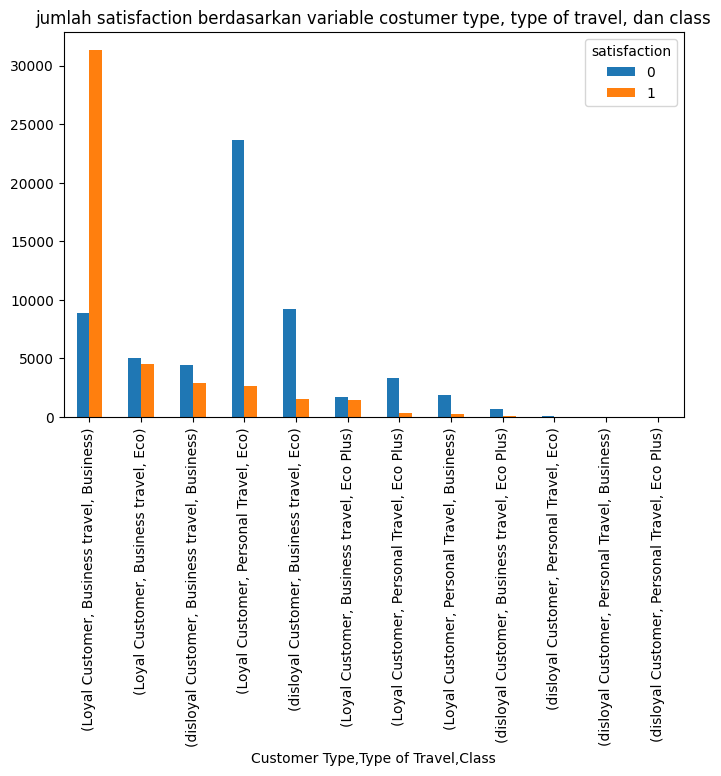

In [35]:
for i in ['Customer Type', 'Type of Travel', 'Class']:
    fig=px.sunburst(df,path=[i,'satisfaction'],color='satisfaction', title=f'Proporsi Target Berdasarkan {i}')
    fig.show()

df_all.sort_values(1,ascending=False).head(12).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='jumlah satisfaction berdasarkan variable costumer type, type of travel, dan class')
plt.show()

satisfaction          0          1  total
Gender                                   
Female        57.262072  42.737928  100.0
Male          56.053619  43.946381  100.0
satisfaction               0          1  total
Customer Type                                 
Loyal Customer     52.270934  47.729066  100.0
disloyal Customer  76.334229  23.665771  100.0
satisfaction             0          1  total
Type of Travel                              
Business travel  41.740866  58.259134  100.0
Personal Travel  89.831928  10.168072  100.0
satisfaction          0          1  total
Class                                    
Business      30.575467  69.424533  100.0
Eco           81.385846  18.614154  100.0
Eco Plus      75.393648  24.606352  100.0


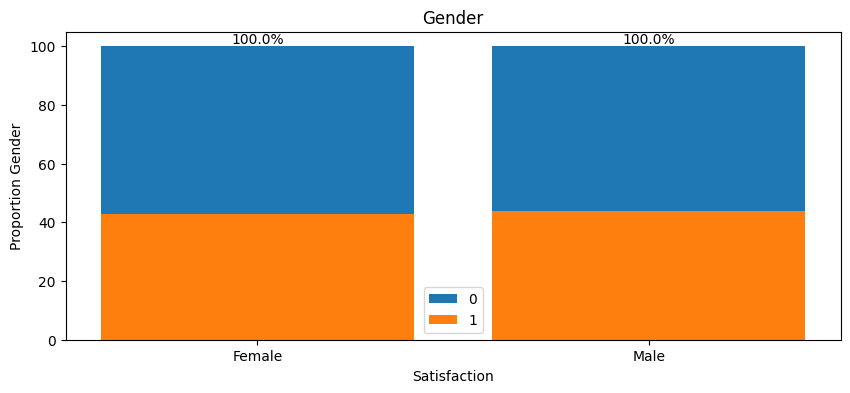

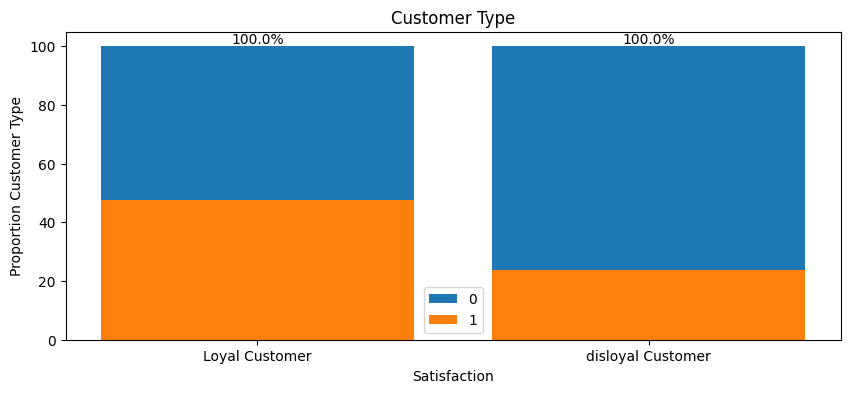

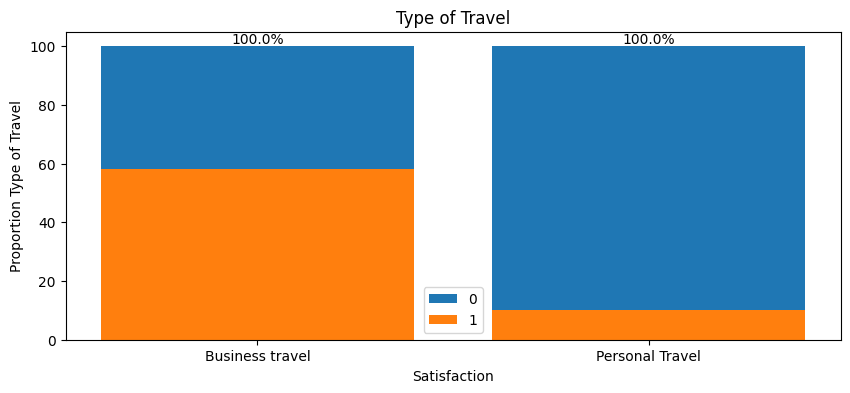

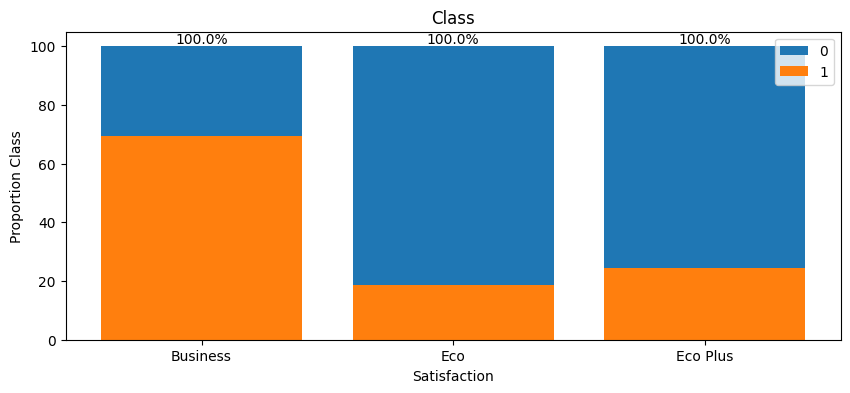

In [36]:
for i in ['Gender',	'Customer Type','Type of Travel','Class',]:
    ct=pd.crosstab(df[i],df['satisfaction'],normalize='index')
    ct = ct * 100
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,4))
    bars=plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('Satisfaction')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    print (ct)
    for bar in bars :
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, '{:.1f}%'.format(height), ha='center', va='bottom')

plt.show()

dari beberapa Cross tab dan Grafik diatas dapat disimpulkan bahwa

1. terlihat untuk by `gender` tidak terdapat perbedaan yang signifikan antara jumlah penumpang pria dengan wanita hanya terpaut 1550 orang atau 50.74 % untuk wanita dan 49.26% pria dari jumlah seluruh penumpang. maka dari itu data gender tidak akan digunakan untuk pembahasan selanjutnya dengan asumsi semua pelayanan yang diberikan memiliki standar yang sama untuk semua gender. dan menghilangkan bias yang dikarenakan oleh perbedaan gender.
2. pada data `customer type` terlihat bahwa jumlah Customer loyal 81 % dari total jumlah seluruh penumpang. maka dari itu penting untuk membahas per customer type dikarenakan perbedaan jumlah data yang signifikan antara custmer loyal dan tidak.
3. hal serupa terjadi pada data tipe perjalanan/ `type of Travel` yang memiliki perbedaan data yang signifikan yaitu 71.654 penumpang melakukan perjalanan bisnis sedangankan sisanya adalah perjalanan personal. 
4. pada data `CLASS` dapat terlihat bahwa layanan eco plus memiliki jumlah data yang sangat sedikit ini mungkin disebabkan oleh layanan tersebut masih baru. namun hal tersebut perlu divalidasi dengan data lain. 

5. terlihat juga pada `grafik` diatas bahwa Loyal Customer yang melakukan perjalanan bisnis dengan menggunakan kelas bisnis menjadi data terpuaskan terbanyak dengan jumlah responden 40.162 orang atau sebanyak 39% dari total jumlah seluruh penumpang. 



# MENGANALISA tipe tipe jasa terhadap kategori yang ada 

dari data diatas saya akan memecah analisa 1 persatu per kategori yang ada, diharapkan pembahasan selanjutnya dapat menjawab pertanyaan :

* apa saja jasa yang dikeluhkan oleh `tipe customer`?
* apa saja jasa yang dikeluhkan pada `tipe perjalanan` yang berbeda?
* apa saja jasa yang dikeluhkan di tiap `class` nya ?

sebelumnya sudah dibuatkan kolom baru bernama overall inflight dan overall beforaafter flight. kolom tersebu pertujuan untuk mempermudah dala menyajikan data dengan sekala yang berarti sebagai berikut

* 5 = very satisfied
* 4 = satisfied
* 3 = neutral
* 2 = unsatisfied
* 1 = very unsatisfied

Skala tersebut didasari dengan pemberian rating yang ada pada survey sehari hari. seperti pada saat memberikan rating di aplikasi yang dapat ditemui sehari-hari. 

data ini diharapkan dapat mempertajam analisa untuk lebih mengkrucutkan data sehingga dapat melihat penyebab dari pertanyaan utama diatas.

In [37]:


for i in ['Customer Type']:
    fig=px.sunburst(df,path=[i,'Overall Inflight'],color='Overall Inflight', title=f'Proporsi kepuasan Berdasarkan {i}')
    fig.show()

for i in ['Customer Type']:
    fig=px.sunburst(df,path=[i,'Overall B\Aflight'],color='Overall B\Aflight', title=f'Proporsi kepuasan Berdasarkan {i}')
    fig.show()

df_ctO=df.pivot_table(columns='Overall Inflight', index=['Customer Type', 'Overall B\Aflight'], aggfunc='size')
df_ctO['Total']=df_ctO.sum(axis =1)
df_ctO.sort_values('Customer Type',ascending=False)

Overall Inflight                         1       2        3        4       5  \
Customer Type     Overall B\Aflight                                            
disloyal Customer 1                  9.0    140.0   209.0    112.0    6.0      
                  2                  104.0  1571.0  2351.0   1686.0   145.0    
                  3                  63.0   1764.0  3706.0   2908.0   386.0    
                  4                  13.0   455.0   1350.0   1395.0   346.0    
                  5                  1.0    17.0    99.0     105.0    40.0     
Loyal Customer    1                  60.0   461.0   197.0    63.0    NaN       
                  2                  225.0  4239.0  6573.0   4350.0   218.0    
                  3                  263.0  6151.0  13329.0  15000.0  1447.0   
                  4                  67.0   2380.0  8268.0   14491.0  2956.0   
                  5                 NaN     24.0    219.0    2666.0   1274.0   

Overall Inflight                       Total  
Customer Type     Overall B\Aflight           
disloyal Customer 1                  476.0    
                  2                  5857.0   
                  3                  8827.0   
                  4                  3559.0   
                  5                  262.0    
Loyal Customer    1                  781.0    
                  2                  15605.0  
                  3                  36190.0  
                  4                  28162.0  
                  5                  4183.0

Pada data diatas dapat terlihat bahwa :

* `loyal customer` 82% data ini adalah tipe customer loyal, yang memberikan rating Satisfied (4) lebih banyak pada saat melakukan penerbangan dibanding dengan saat Sesudah dan sebelum penerbangan. sedangkan rating neutral(3) lebih banyak pada saat sesudah dan sebelum Penerbangan.  namun dari kedua grafik dapat di lihat bahwa customer loyal memiliki kecenderungan neutral hingga satisfied.

* `disloyal customer` pada tipe customer ini dapat  dilihat bahwa jumlah customer tipe ini hanya 18 % dari keseluruhan data. dalam kedua grafik dapat terlihat bahwa pilihan 'neutral' menjadi pilihan yang lebih banyak dipipilih. pada sebelum dan sesudah keberangkatan lebih banyak disloya customer yang cenderung tidak terpuaskan, sedangkan jasa pada saat penerbangan cenderung terpuaskan. 



In [38]:
grouped = df.groupby('Customer Type')
mean = grouped['Inflight wifi service'].mean()
mean1 = grouped['Food and drink'].mean()
mean2 = grouped['Seat comfort'].mean()
mean3 = grouped['Leg room service'].mean()
mean4 = grouped['Inflight service'].mean()
mean5 = grouped['Cleanliness'].mean()
mean6 = grouped['Departure/Arrival time convenient'].mean()



print(mean,mean1,mean2,mean3,mean4,mean5,mean6,)


Customer Type
Loyal Customer       2.734436
disloyal Customer    2.708498
Name: Inflight wifi service, dtype: float64 Customer Type
Loyal Customer       3.239493
disloyal Customer    3.034930
Name: Food and drink, dtype: float64 Customer Type
Loyal Customer       3.538854
disloyal Customer    2.994415
Name: Seat comfort, dtype: float64 Customer Type
Loyal Customer       3.380801
disloyal Customer    3.217849
Name: Leg room service, dtype: float64 Customer Type
Loyal Customer       3.627842
disloyal Customer    3.696802
Name: Inflight service, dtype: float64 Customer Type
Loyal Customer       3.338220
disloyal Customer    3.054265
Name: Cleanliness, dtype: float64 Customer Type
Loyal Customer       3.209477
disloyal Customer    2.392972
Name: Departure/Arrival time convenient, dtype: float64


In [39]:
grouped = df.groupby('Customer Type')
mean7 = grouped['Ease of Online booking'].mean()
mean8 = grouped['Inflight entertainment'].mean()
mean9 = grouped['Baggage handling'].mean()
mean10 = grouped['Checkin service'].mean()
mean11 = grouped['Gate location'].mean()
mean12 = grouped['On-board service'].mean()
mean13 = grouped['Online boarding'].mean()
print(mean7,mean8,mean9,mean10,mean11,mean12,mean13)

Customer Type
Loyal Customer       2.769821
disloyal Customer    2.699173
Name: Ease of Online booking, dtype: float64 Customer Type
Loyal Customer       3.427456
disloyal Customer    3.048206
Name: Inflight entertainment, dtype: float64 Customer Type
Loyal Customer       3.618021
disloyal Customer    3.693588
Name: Baggage handling, dtype: float64 Customer Type
Loyal Customer       3.323536
disloyal Customer    3.218166
Name: Checkin service, dtype: float64 Customer Type
Loyal Customer       2.973222
disloyal Customer    2.993309
Name: Gate location, dtype: float64 Customer Type
Loyal Customer       3.416799
disloyal Customer    3.228228
Name: On-board service, dtype: float64 Customer Type
Loyal Customer       3.371098
disloyal Customer    2.710131
Name: Online boarding, dtype: float64


pada nilai rata rata diatas dapat dilihat bahwa ada beberapa data dengan rata rata kurang dari 3(neutral) yang menunjukan data berada pada nilai tidak terpuaskan (unsatisfied)

berdasarkan customer type untuk customer loyal ada beberapa jasa yang dikeluhkan oleh customer yaitu `gate location`(2.97), `ease of online booking`(2.76), dan `inflight wifi service`(2,73). 

* `gate location, ease of online booking` merupakan termasuk kedalam data overall B\Aflight yang dimana juga menunjukan lebih banyak customer yang neutral dibandingkan dengan yang terpuaskan. hal ini dapat disebabkan oleh beberapa hal yaitu :
1. kurangnya kesiapan bandara untuk menunjukan posisi gerbang keberangkatan dan kedatangan
2. kemudahan dalam booking online di tentukan oleh aplikasi yang digunakan oleh customer maka dari itu dibutuhkan data lebih mengenai rincian keluhan yang ada/ mengapa customer tidak terpuaskan.

* `inflight wifi service` untuk layanan wifi menurut domain knowledge memang hanya ada di penerbangan tertentu dan pembeda ada dan tidaknya wifi service pada sebuah maskapai banykanya ditentukan oleh class penerbangan yang dipilih. maka dari itu akan dianalisa lebih jauh pada saat pembagian menggunakan kelas.

* untuk data satisfied sendiri tidak ada yang memiliki rata rata lebih dari 3, hal ini dapat menjadi evaluasi untuk maskapai.

Berdasarkan data `Disloyal Customer`  jasa yang memiliki rating 'unsatisfied' ada `Inflight wifi service (2.71), Seat comfort (2.99), Departure Arrival time convenient(2.39), ease online booking(2.69), Gate location (2.99), Online boarding(2.71)`  jasa D/A time Convinient menjadi jasa yang paling buruk dengan rata rata 2.39 yang artinya memang ada yang kurang data tersebut. namun D/A tiem convenient dapat mengalami gangguan dari luar maskapai.

## beradasarkan Type Of Travel

In [40]:


for i in ['Type of Travel']:
    fig=px.sunburst(df,path=[i,'Overall Inflight'],color='Overall Inflight', title=f'Proporsi kepuasan Berdasarkan {i}')
    fig.show()

for i in ['Type of Travel']:
    fig=px.sunburst(df,path=[i,'Overall B\Aflight'],color='Overall B\Aflight', title=f'Proporsi kepuasan Berdasarkan {i}')
    fig.show()

df_ttO=df.pivot_table(columns='Overall Inflight', index=['Type of Travel', 'Overall B\Aflight'], aggfunc='size')
df_ttO['Total']=df_ttO.sum(axis =1)
df_ttO.sort_values('Type of Travel',ascending=False)

Overall Inflight                       1       2       3        4       5  \
Type of Travel  Overall B\Aflight                                           
Personal Travel 1                  8.0    79.0    60.0    27.0    NaN       
                2                  101.0  1600.0  2038.0  1053.0   52.0     
                3                  127.0  3420.0  7422.0  4842.0   448.0    
                4                  32.0   1146.0  4264.0  4516.0   752.0    
                5                 NaN     22.0    75.0    128.0    36.0     
Business travel 1                  61.0   522.0   346.0   148.0    6.0      
                2                  228.0  4210.0  6886.0  4983.0   311.0    
                3                  199.0  4495.0  9613.0  13066.0  1385.0   
                4                  48.0   1689.0  5354.0  11370.0  2550.0   
                5                  1.0    19.0    243.0   2643.0   1278.0   

Overall Inflight                     Total  
Type of Travel  Overall B\Aflight           
Personal Travel 1                  174.0    
                2                  4844.0   
                3                  16259.0  
                4                  10710.0  
                5                  261.0    
Business travel 1                  1083.0   
                2                  16618.0  
                3                  28758.0  
                4                  21011.0  
                5                  4184.0

pada data diatas dapat terlihat bahwa :

* `Business Travel` pada saat penerbangan terdapat 32rb data terpuaskan sedangkan pada sebelum dan sesudah penerbangan 'neutral' menjadi pilihan yang terbanyak dipilih. hal ini masih seperti grafik sebelumnya tentang 'Customer type' dimana secara grafik lebih banyak yang terpuaskan saat inflight dibandingkan saat before dan after flight

* `Personal Travel` meiliki proporsi data yang mirip antara grafik 1 dan 2 dimana 'neutral' menjadi data terbanyak di kedua grafik tersebut. namun pada overall inflight data satisfied - very satisfied masih lebih tinggi dipandingkan data Overall B/Aflight 

In [41]:
grouped = df.groupby('Type of Travel')
mean = grouped['Inflight wifi service'].mean()
mean1 = grouped['Food and drink'].mean()
mean2 = grouped['Seat comfort'].mean()
mean3 = grouped['Leg room service'].mean()
mean4 = grouped['Inflight service'].mean()
mean5 = grouped['Cleanliness'].mean()
mean6 = grouped['Departure/Arrival time convenient'].mean()



print(mean,mean1,mean2,mean3,mean4,mean5,mean6)

Type of Travel
Business travel    2.823304
Personal Travel    2.521707
Name: Inflight wifi service, dtype: float64 Type of Travel
Business travel    3.258688
Personal Travel    3.076439
Name: Food and drink, dtype: float64 Type of Travel
Business travel    3.549460
Personal Travel    3.194834
Name: Seat comfort, dtype: float64 Type of Travel
Business travel    3.473540
Personal Travel    3.078827
Name: Leg room service, dtype: float64 Type of Travel
Business travel    3.658261
Personal Travel    3.600843
Name: Inflight service, dtype: float64 Type of Travel
Business travel    3.356058
Personal Travel    3.131450
Name: Cleanliness, dtype: float64 Type of Travel
Business travel    2.794540
Personal Travel    3.650862
Name: Departure/Arrival time convenient, dtype: float64


In [42]:
grouped = df.groupby('Type of Travel')
mean7 = grouped['Ease of Online booking'].mean()
mean8 = grouped['Inflight entertainment'].mean()
mean9 = grouped['Baggage handling'].mean()
mean10 = grouped['Checkin service'].mean()
mean11 = grouped['Gate location'].mean()
mean12 = grouped['On-board service'].mean()
mean13 = grouped['Online boarding'].mean()
print(mean7,mean8,mean9,mean10,mean11,mean12,mean13)

Type of Travel
Business travel    2.882212
Personal Travel    2.478510
Name: Ease of Online booking, dtype: float64 Type of Travel
Business travel    3.490691
Personal Travel    3.063725
Name: Inflight entertainment, dtype: float64 Type of Travel
Business travel    3.656642
Personal Travel    3.576687
Name: Baggage handling, dtype: float64 Type of Travel
Business travel    3.290047
Personal Travel    3.335928
Name: Checkin service, dtype: float64 Type of Travel
Business travel    3.003210
Personal Travel    2.918414
Name: Gate location, dtype: float64 Type of Travel
Business travel    3.431225
Personal Travel    3.273753
Name: On-board service, dtype: float64 Type of Travel
Business travel    3.453876
Personal Travel    2.798127
Name: Online boarding, dtype: float64



pada data diatas dapat terlihat jasa yang dikeluhkan oleh customer dengan tipe perjalanan berbeda adalah 

* `Inflight Wifi service`dan `Ease of online booking` menjadi jasa yang dikeluhkan oleh kedua tipe perjalanan baik itu perjalanan bisni maupun perjalan personal. pada data ini kita dapat melihat bahwa Inflight Wifi service memang ada kekurangan namun belum dapat disimpulkan karena bisa saja orang yang melakukan perjalanan bisnis tapi tidak menggunakan Kelas bisnis 

* `D/A time convenient` menjadi hal yang dikeluhkan oleh pelanggan yang sedang melakukan perjalanan bisnis. hal ini harus menjadi perhatian karena dengan ini para maskapai dapat kehilangan pelanggan tipe perjalanan bisnis karena seperti data sebelumnya dimana 72% dari keseluruhan data pelanggan adalah yang melakukan perjalanan bisnis.

* `online boarding` dan `gate location` menjadi jasa yang dikeluhkan oleh penumpang yang pelakukan perjalanan pribadi.


# Berdasarkan CLASS penerbangan

In [43]:
for i in ['Class']:
    fig=px.sunburst(df,path=[i,'Overall Inflight'],color='Overall Inflight', title=f'Proporsi kepuasan Berdasarkan {i}')
    fig.show()

for i in ['Class']:
    fig=px.sunburst(df,path=[i,'Overall B\Aflight'],color='Overall B\Aflight', title=f'Proporsi kepuasan Berdasarkan {i}')
    fig.show()

df_clO=df.pivot_table(columns='Overall Inflight', index=['Class', 'Overall B\Aflight'], aggfunc='size')
df_clO['Total']=df_clO.sum(axis =1)
df_clO.sort_values('Class',ascending=False)

Overall Inflight                1       2       3        4       5    Total
Class    Overall B\Aflight                                                 
Eco Plus 1                  6.0    80.0    44.0    12.0    NaN      142.0  
         2                  43.0   542.0   756.0   405.0    28.0    1774.0 
         3                  31.0   711.0   1407.0  1047.0   113.0   3309.0 
         4                  7.0    253.0   867.0   896.0    143.0   2166.0 
         5                 NaN    NaN      23.0    69.0     11.0    103.0  
Eco      1                  26.0   272.0   240.0   117.0    5.0     660.0  
         2                  201.0  3166.0  4344.0  2611.0   185.0   10507.0
         3                  190.0  4857.0  9749.0  6699.0   701.0   22196.0
         4                  49.0   1628.0  5108.0  5196.0   893.0   12874.0
         5                  1.0    28.0    128.0   283.0    67.0    507.0  
Business 1                  37.0   249.0   122.0   46.0     1.0     455.0  
         2                  85.0   2102.0  3824.0  3020.0   150.0   9181.0 
         3                  105.0  2347.0  5879.0  10162.0  1019.0  19512.0
         4                  24.0   954.0   3643.0  9794.0   2266.0  16681.0
         5                 NaN     13.0    167.0   2419.0   1236.0  3835.0

pada data diatas dapat terlihat bahwa :

*   `business` pada klas ini 'terpuaskan'(satisfied) menjadi pilihan terbanyak pada 'overall Inflight' dan pada kelas ini 'satisfied-very satisfied' menjadi data paling banyak yaitu sebanyak 55% dari kelas ini. sedangkan pada 'overall B/Aflight' pilihan 'neutral menjadi pilihan yang paling banyak dipilih dengan 19rb data 

* `ECO` pada kelas ini data cenderung sama antara 'overall inflight dan overall b/aflight' karena jumlah data 3,4,dan 2 yang memiliki proporsi yang hampir sama. namun perbedaan yang terlihat ada di data 'very Satisfied' yang berbeda dengan jumlah yang lebih banyak pada 'overall inflight yaitu 1851 data sedangan kan pada 'overall b/aflight hanya 507 data.

* `ECO plus` kelas ini adalah kelas dengan data yang sedikit yaitu hanya 7494 data saja. hasil dari grafik pun mirip dengan kelas `eco` yaitu proporsi data 3,4,dan 2 yang mirip dan dapat terlihat perbedaan pada data 'very satisfied'(5) sebanyak 295 pada 'overall inflight' dan 103 pad 'overall b/aflight.

In [44]:
grouped = df.groupby('Class')
mean = grouped['Inflight wifi service'].mean()
mean1 = grouped['Food and drink'].mean()
mean2 = grouped['Seat comfort'].mean()
mean3 = grouped['Leg room service'].mean()
mean4 = grouped['Inflight service'].mean()
mean5 = grouped['Cleanliness'].mean()
mean6 = grouped['Departure/Arrival time convenient'].mean()



print(mean,mean1,mean2,mean3,mean4,mean5,mean6,)

Class
Business    2.775330
Eco         2.675081
Eco Plus    2.767948
Name: Inflight wifi service, dtype: float64 Class
Business    3.323131
Eco         3.086300
Eco Plus    3.122631
Name: Food and drink, dtype: float64 Class
Business    3.760833
Eco         3.138863
Eco Plus    3.183747
Name: Seat comfort, dtype: float64 Class
Business    3.644471
Eco         3.085701
Eco Plus    3.061382
Name: Leg room service, dtype: float64 Class
Business    3.844596
Eco         3.463931
Eco Plus    3.388444
Name: Inflight service, dtype: float64 Class
Business    3.477569
Eco         3.108121
Eco Plus    3.130771
Name: Cleanliness, dtype: float64 Class
Business    2.905928
Eco         3.199149
Eco Plus    3.217507
Name: Departure/Arrival time convenient, dtype: float64


In [45]:
grouped = df.groupby('Class')
mean7 = grouped['Ease of Online booking'].mean()
mean8 = grouped['Inflight entertainment'].mean()
mean9 = grouped['Baggage handling'].mean()
mean10 = grouped['Checkin service'].mean()
mean11 = grouped['Gate location'].mean()
mean12 = grouped['On-board service'].mean()
mean13 = grouped['Online boarding'].mean()
print(mean7,mean8,mean9,mean10,mean11,mean12,mean13)

Class
Business    2.913982
Eco         2.605254
Eco Plus    2.661996
Name: Ease of Online booking, dtype: float64 Class
Business    3.635450
Eco         3.098280
Eco Plus    3.141713
Name: Inflight entertainment, dtype: float64 Class
Business    3.842904
Eco         3.450539
Eco Plus    3.363758
Name: Baggage handling, dtype: float64 Class
Business    3.519149
Eco         3.122026
Eco Plus    3.017214
Name: Checkin service, dtype: float64 Class
Business    2.982945
Eco         2.971954
Eco Plus    2.967574
Name: Gate location, dtype: float64 Class
Business    3.679466
Eco         3.120336
Eco Plus    3.047638
Name: On-board service, dtype: float64 Class
Business    3.716515
Eco         2.812960
Eco Plus    2.889245
Name: Online boarding, dtype: float64


Pada nilai rata rata diatas terdapat jasa yang 'secara umum' memiliki kekurangan yang sama di ketiga kategori `CLASS` yaitu `inflight wifi service , ease of online booking dan juga gate location`. 

sedangkan untuk data `unsatisfied` yang berbeda ada pada `D/A time Convenient dan Online boarding` dimana :

* pada data D/A time convenient memeiliki rata rata yang lebih rendah dari 3 atau tepat nya 2.9 untuk kelas bisnis. sebagaimana yang sudah diberikan di penjelas sebelumnya yaitu D/A time convenient menjadi poin penting untuk kelas bisnis.

* Online boarding pada kelas eco dan eco plus juga memiliki nilai masing masing 2,81 dan 2,88 dimana ini menunjukan ketidak puasan. seperti pada data sebelumnya bahwa online boarding menjadi jasa yang tidak terpuaskan pada 3 kategori sebelumnya dan selalu memiliki rata rata pada klas yang tidak 'premium'

#   Membandingkan kedua data Overall

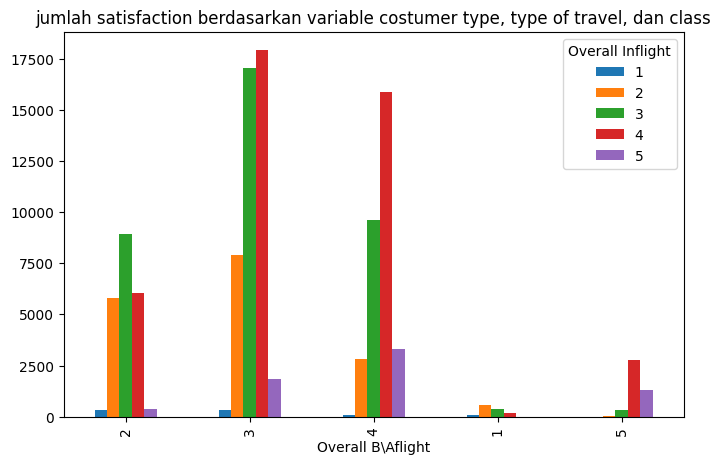

Overall Inflight,1,2,3,4,5,Total
Overall B\Aflight,,,,,,
1,69,601,406,175,6,1257
2,329,5810,8924,6036,363,21462
3,326,7915,17035,17908,1833,45017
4,80,2835,9618,15886,3302,31721
5,1,41,318,2771,1314,4445


In [46]:
df_clO=df.pivot_table(columns='Overall Inflight', index=['Overall B\Aflight'], aggfunc='size')
df_clO['Total']=df_clO.sum(axis =1)
df_clO.sort_values(1,ascending=False).head(12).drop(columns='Total').plot(kind='bar',figsize=(8,5), 
title='jumlah satisfaction berdasarkan variable costumer type, type of travel, dan class')
plt.show()

df_clO.sort_values('Overall B\Aflight',ascending=True)

pada tabel dan grafik diatas saya mencoba membandingkan data antara overall inflight dengan overall b\A flight untuk melihat sebaran data satisfaction yang ada.


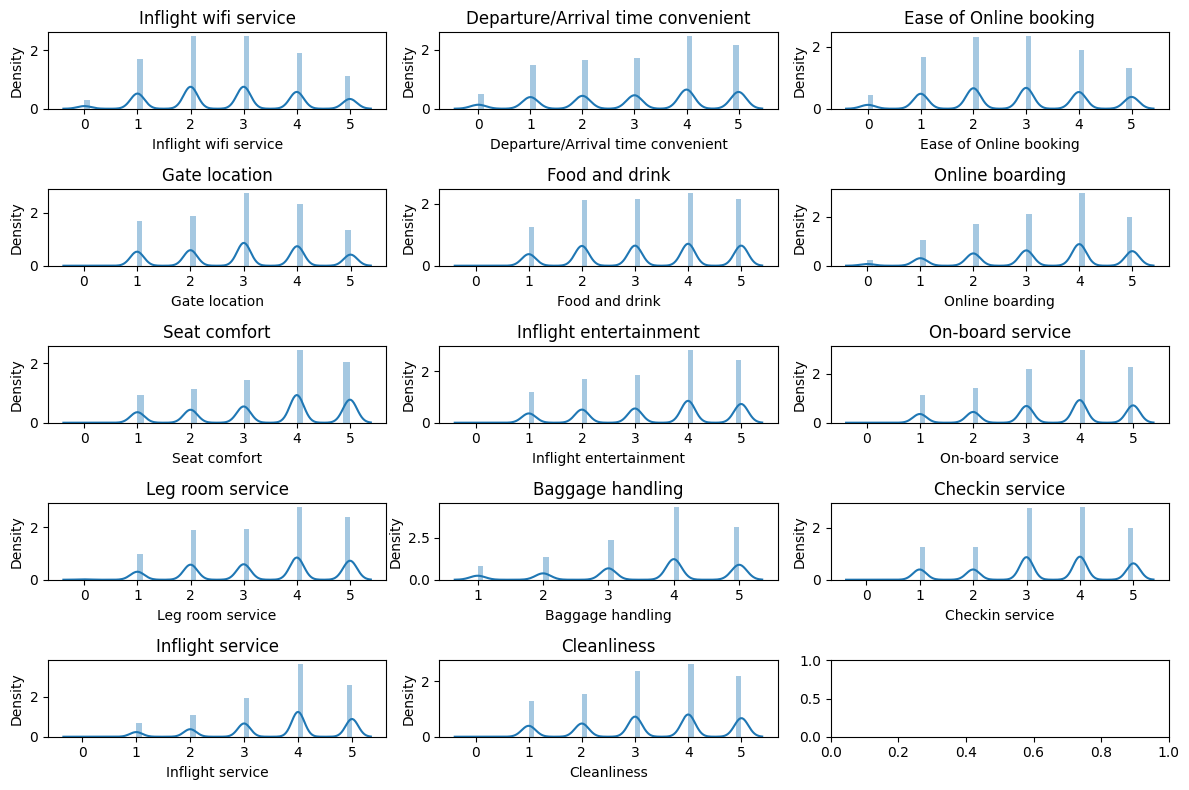

In [47]:
response_columns = ['Inflight wifi service',
                    'Departure/Arrival time convenient',
                    'Ease of Online booking',
                    'Gate location',
                    'Food and drink',
                    'Online boarding',
                    'Seat comfort',
                    'Inflight entertainment',
                    'On-board service',
                    'Leg room service',
                    'Baggage handling',
                    'Checkin service',
                    'Inflight service',
                    'Cleanliness']
fig, ax = plt.subplots(5, 3, figsize=(12, 8))
ax = ax.ravel()

for i, col in enumerate(response_columns):
    sns.distplot(df[col], ax=ax[i])
    ax[i].set_title(col)

fig.tight_layout()
plt.show()

pada tabel yang banyak diatas digunakan untuk melihat masing masing variable satisfaction yang ada dan melihat secara keseluruhan bagian mana yang harus diperbaiki jasanya.

dan dapat dilihat bahwa 
* jasa jasa yang harus diperbaiki adalah `inflight Wifi Service`, `ease of online booking` dan `gate location`, dikarenakan jasa tersebut memiliki data yang cenderung tidak memuaskan. hal ini juga selaras dengan pembahasan sebelumnya. dimana ketiga jasa ini merupakan data yang memiliki rata rata kurang dari 3(neutral)



In [48]:
overall_inflight=df[['Inflight wifi service', 'Food and drink','Seat comfort','Leg room service','Inflight service','Cleanliness']].mean()
print(overall_inflight)
print (overall_inflight.mean())

Inflight wifi service    2.729697
Food and drink           3.202123
Seat comfort             3.439395
Leg room service         3.351033
Inflight service         3.640440
Cleanliness              3.286347
dtype: float64
3.274839111213772


In [49]:
overall_beforeafterflight=df[['Departure/Arrival time convenient', 'Ease of Online booking','Gate location','Online boarding','Baggage handling','Checkin service']].mean()
print(overall_beforeafterflight)
print (overall_beforeafterflight.mean())

Departure/Arrival time convenient    3.060316
Ease of Online booking               2.756915
Gate location                        2.976892
Online boarding                      3.250351
Baggage handling                     3.631826
Checkin service                      3.304287
dtype: float64
3.163431246110117


# Berdasarkan AGE (Umur)

In [50]:
df_age=df.pivot_table(columns='satisfaction', index=['Age'], aggfunc='size')
df_age['Total']=df_age.sum(axis =1) 
df_age.sort_values('Total', ascending=False)
df_age.sort_values(1,ascending=False).head(25)

satisfaction,0,1,Total
Age,,,
39,1374,1595,2969
41,963,1493,2456
40,1100,1474,2574
44,1047,1435,2482
42,1051,1406,2457
47,975,1353,2328
43,970,1345,2315
45,999,1340,2339
46,884,1325,2209


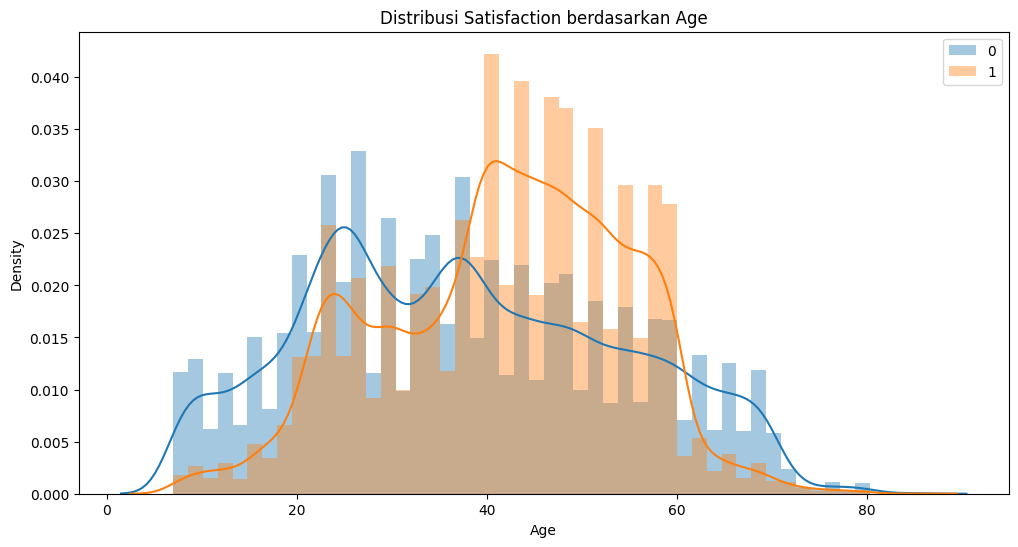

In [51]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['satisfaction']==0]['Age'],label=0)
sns.distplot(df[df['satisfaction']==1]['Age'],label=1)
plt.title('Distribusi Satisfaction berdasarkan Age')
plt.legend()
plt.show()

In [52]:
from scipy.stats import normaltest
stats, pval=normaltest(df['Age'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho



tidak normal


In [53]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['satisfaction']==i]['Age'] for i in df['satisfaction'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


pada distribusi AGE terhadap satisfaction. dapat dilihat bahwa

* `Age` memiliki pengaruh yang signifikan terhadap tingkat kepuasan customer. hal ini dipuktikan dengan uji statistika diatas. 

* `umur` yang memiliki tingkat satisfaction yang tinggi ada pada range 38-58, sedangkan tingkat ketidakpuasan/neutral memiliki distribusi yang dapat dibilang merata dari umur 20 hingga 58.


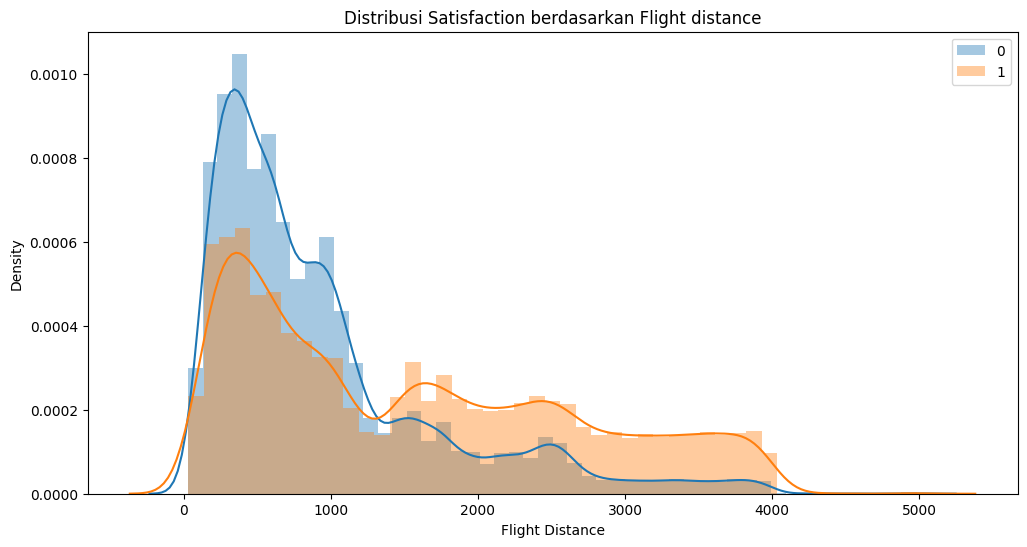

In [54]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['satisfaction']==0]['Flight Distance'],label=0)
sns.distplot(df[df['satisfaction']==1]['Flight Distance'],label=1)
plt.title('Distribusi Satisfaction berdasarkan Flight distance')
plt.legend()
plt.show()

In [55]:
from scipy.stats import normaltest
stats, pval=normaltest(df['Flight Distance'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [56]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['satisfaction']==i]['Flight Distance'] for i in df['satisfaction'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


pada grafik dan p val test diatasdapat disimpulkan bahwa

* data dari `flight distance` memang terdistribusi tidak normal namun memiliki pengaruh yang signifikan terhadap satisfaction (kepuasan) dimana semakin jauh penerbangan(>1500 miles) semakin tinggi perbandingan antara yang puas dengan yang tidak/netral.
* namun pada `flight distance` yang lebih dekat (<1500 miles) terlihat jumlah yang melakukan penerbangan lebih banyak juga perbandingan antara yang terpuaskan/tidak, menjadi lebih banyak yang tidak terpuaskan/netral.

# KESIMPULAN DAN REKOMENDASI

Dari analisis yang sudah dilakukan, dapat di jadikan beberapa kesimpulan penumpamh yamg ter puaskan berikut :

* dari 103.902 data satisfied(terpuaskan) hanya ada 45.024 data yang menunjukan lebih banyak yang 'unsatisfied/netral' namun memang ada permasalahan mendasar dimana data `Satisfaction` hanya memiliki 2 unique dengan value yang ambigu yaitu satisfied dan Unsatisfied or neutral dimana ini membuat bisa antara unsatisfied atau netral.
* customer yang paling banyak terpuaskan adalah customer yang berada pada range umur produktif 28-58 dengan menggunakan kelas bisnis sedang melakukan perjalanan bisnis dan merupakan seorang yang terdaftar menjadi customer loyal.
* flight distance yang lebih jauh >1500 miles memiliki tingakt satsifaction yang tinggi dibandingkan dengan flight distance yang tidak jauh. 


Sedangkan pada data unsatisfied/netral :

* 3 jasa yang harus di benahi adalah Inflight wifi service , ease of online booking, dan gate location. dimana untuk inflight wifi service sendiri merupakan data yang konsisten di komplain oleh customer dari berbagai macam kategori.

* adapun jasa jasa yang harus dibenahi secara spesifik adalah  `D/A time convenient` pada class bisnis juga pada tipe perjalanan bisnis juga untuk para disloyal customer.





 **Rekomendasi**

 1.  pengambilan data harus lebih general / menyamakan semua fasilitas yang diberikan jika ingin data lebih akurat.
 2. hilangkan data yang dipengaruhi oleh hal diluat maskapai contoh `gate location` `online checking` dan `ease of online booking` karena data data tersebut terpengaruhi oleh infra sturktur bandara maupun desain dari aplikasi yang digunakan diluar maskapai. 
 3. untuk analisis yang lebih akurat diperlukannya penambahan keterangan pada data agar ketika da outlier ataupun seperti data diatas yaitu `inflight wifi service` seharusnya da keterangan yang menunjukan bahwa memang ada / tidaknya jasa tersebut dikarenakan domain knowledge yang saya punya wifi hanya untuk kelas bisnis maka menurut saya sangat wajar jika jasa tersebut memiliki tingkat kepuasan yang rendah. juga pada kolom satisfaction harus diberikan data baru jangan menggunakan 'or' pada suatu opsi kategori contohnya yaitu  disatisfied `or` neutral. hal ini membuat analisa yang dibuat pun bisa jadi bias karena menurut saya apabila masih neutral berarti belum urgent untuk dibenahi.
 4. data satisfaction yang ada tumpang tindih dengan hasil kuisioner kategorikal 0-5 yang ada. membuat data seperti memiliki dua jawaban. karena satisfaction akan mewakili semuanya tapi tidak di jelaskan bagaimana data satisfaction bisa ada.
 5. departure/ arrival delay in minutes seharusnya terdapat kategori tertentu karena kecepatan pesawat tidak bisa diubah dengan mudah pun kondisi bandara yang tidak bisa diduga sedangkan data tersebut meminta diisi menggunakan menit dengan tepat, hal ini jika ingin di tambahkan harus diberikan keterangan jelas kenapa hal itu bisa terjadi sehingga data dapat dilihat perkasus dan menjadi rekomendasi kedepannya.
 6. gender tidak harus ada dalam data karena perlakuan jasa yang diberikan harus standar untuk semua manusia.
 

